In [1]:
# Importing Libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import ComplementNB
np.random.seed(0)

In [2]:
df = pd.read_csv("./fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# **<span style="color:#F7B2B0;">DATA ANALYSIS</span>**

**The analysis consists of:**
* Count Plot
* Correlation Heat Map
* Line Plot
* Violin Plot


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

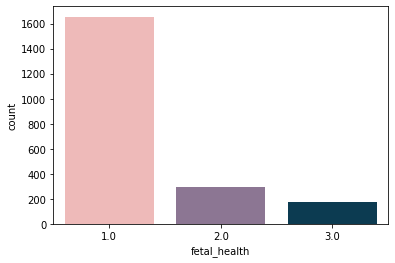

In [5]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colors=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data=df, x="fetal_health", palette=colors)

This count plot shows an imbalance in classification values. This tends to result in misleading classification accuracy.

The performance measures that would provide better insight:
* Confusion Matrix
* Precision
* Recall
* F1 Score 

Let's evaluate the correlation matrix.

<AxesSubplot:>

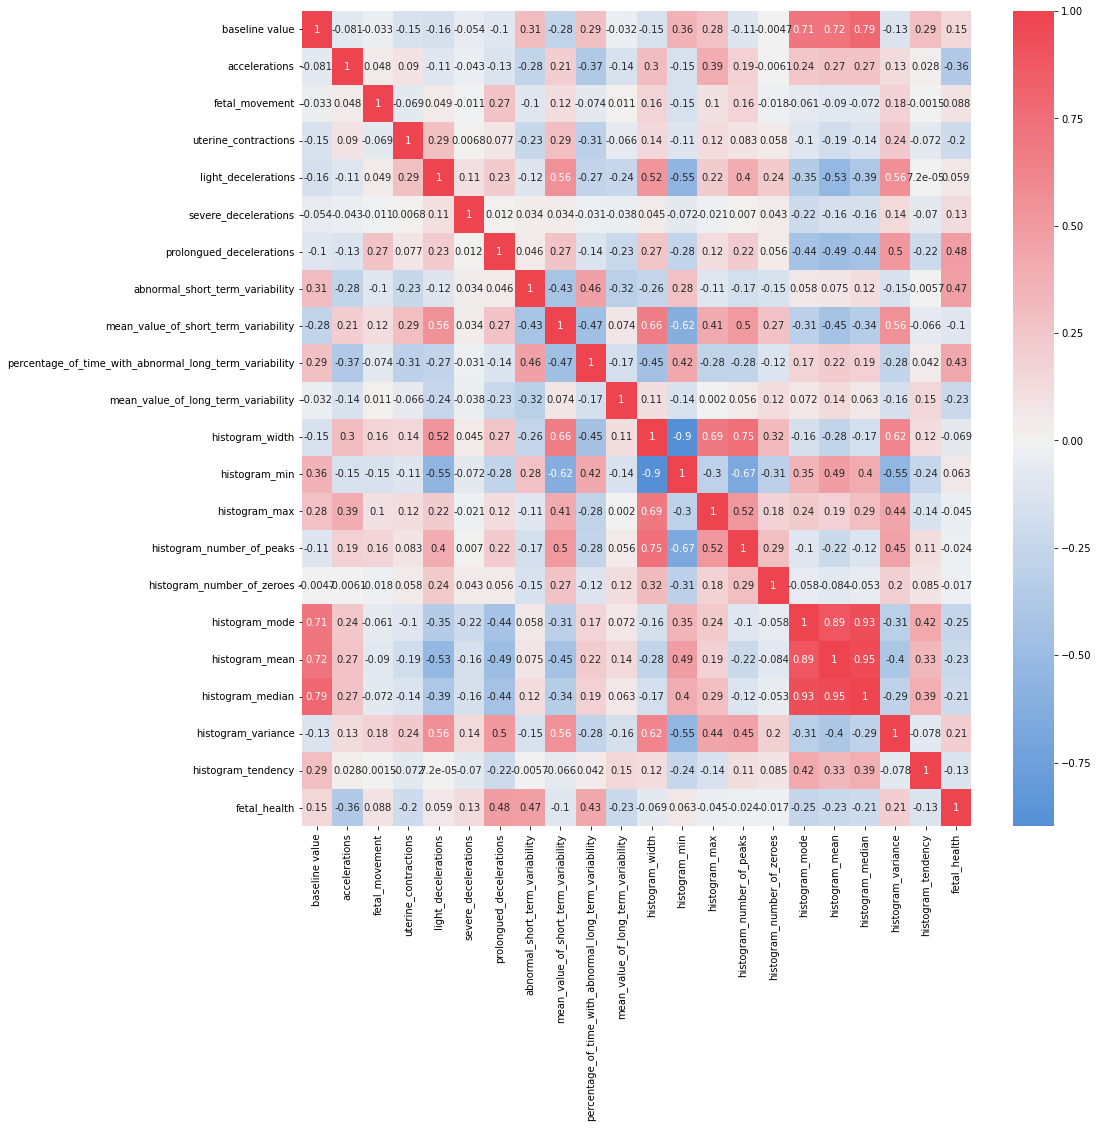

In [6]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15, 15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

Based on this correlation matrix, the features with the highest correlation to the fetal health classification are (in order of significance):

* prolongued_decelerations
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability
* accelerations

Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health.

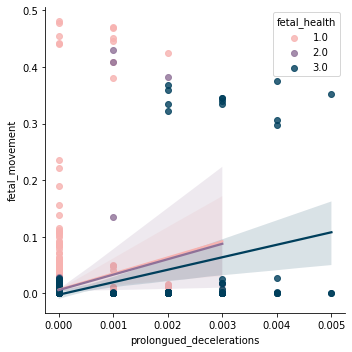

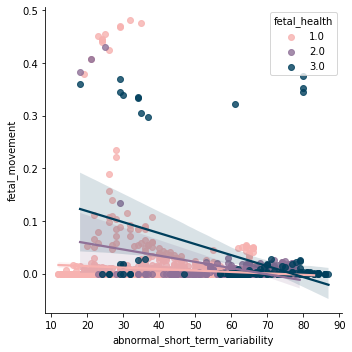

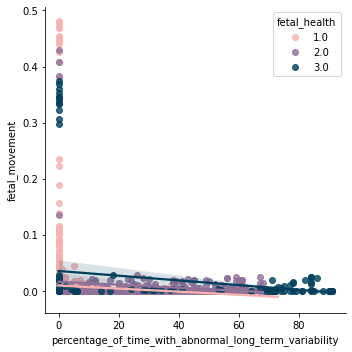

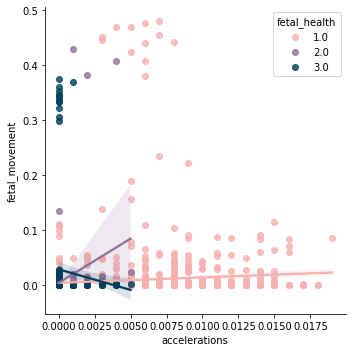

In [7]:
features = ['prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'accelerations']

for feature in features:
    sns.lmplot(data=df, x=feature, y="fetal_movement", palette=colors, hue="fetal_health", facet_kws={'legend_out': False})
    plt.show()

We can see the rates of change of the above-mentioned values with each target show a specific trend. 
We can also spot outliers. Let's have a look at outliers on a more suitable plot.

In [8]:
# columns for detailed visualisation
cols=[
    #'baseline value',
    #'accelerations',
    #'fetal_movement',
    #'uterine_contractions',
    #'light_decelerations',
    #'severe_decelerations',
    'prolongued_decelerations',
    'abnormal_short_term_variability',
    #'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    #'mean_value_of_long_term_variability'
]

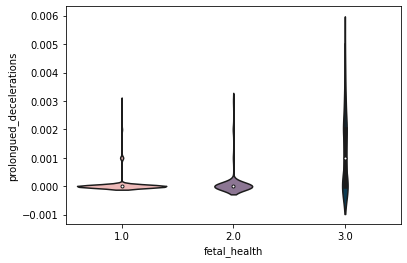

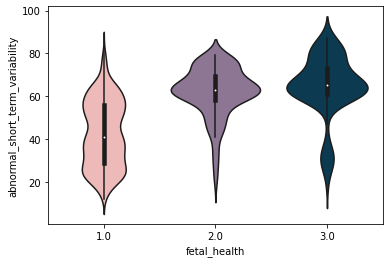

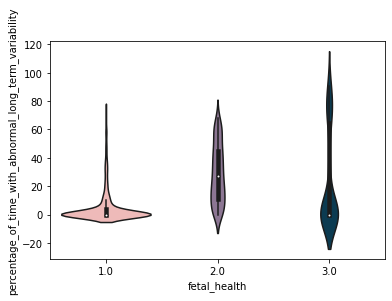

In [9]:
for i in cols:
    # Omit the swarmplot because we have way too many rows, and it will take forever and won't be very meaningful
    #sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5, s=1 )
    #sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colors)
    sns.violinplot(x=df["fetal_health"], y=df[i], palette=colors)
    plt.show()

We have outliers in our dataset. We could remove them, but that may lead to a poor representation of real-world data.

Generally speaking, for outliers:

If the outlier is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error. 

If it is not a part of the population you are studying, you can legitimately remove the outlier. In our case, the records are labeled by experts, so we should leave the outliers because we aren't experts. 

We can assume the outliers are natural part of the population we are studying and should not remove them.

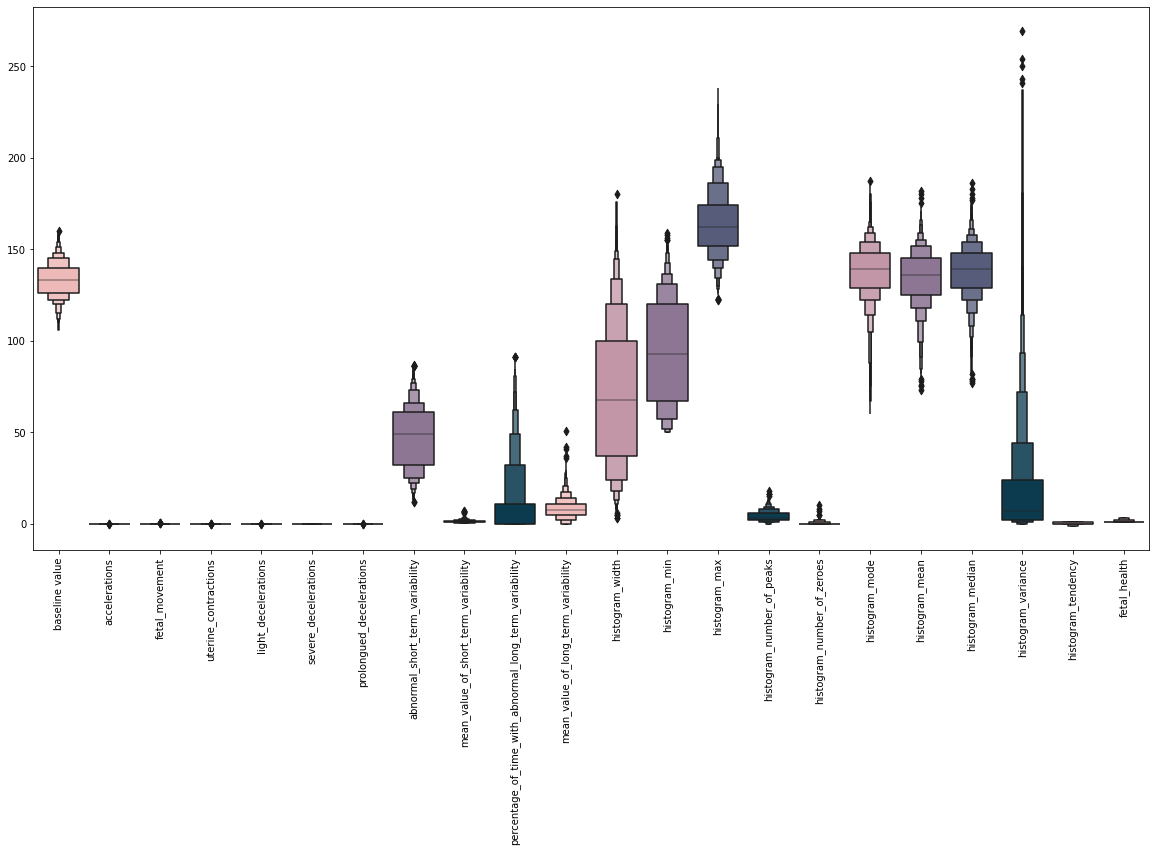

In [10]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20, 10))
sns.boxenplot(data=df, palette=shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In the model building, we will preprocess the features to do the same.

# **<span style="color:#F7B2B0;">MODEL SELECTION AND BUILDING</span>**
In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

In [11]:
# Assigning values to features as X and target as y
# We should see how many of these features we actually need. More features makes the model more accurate but could result in overfit
X = df.drop([
    "fetal_health",
    'baseline value',
    #'accelerations',
    #'fetal_movement',
    #'uterine_contractions',
    'light_decelerations',
    #'severe_decelerations',
    #'prolongued_decelerations',
    #'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    #'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability',
    'histogram_width',
    'histogram_min',
    'histogram_max',
    'histogram_number_of_peaks',
    'histogram_number_of_zeroes',
    'histogram_mode',
    'histogram_mean',
    'histogram_median',
    'histogram_variance',
    'histogram_tendency'
], axis=1)

y = df["fetal_health"]

# Set up a min max scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.MinMaxScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

# Since we have such a high imbalance in our class representations, we can oversample our data
counter = Counter(y)
print(counter)
oversample = SMOTE()
X_df, y = oversample.fit_resample(X_df, y)
counter = Counter(y)
print(counter)

X_df.describe().T

Counter({1.0: 1655, 2.0: 295, 3.0: 176})
Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


,count,mean,std,min,25%,50%,75%,max
accelerations,4965.0,0.080998,0.155861,0.0,0.000000,0.000000,0.105263,1.0
fetal_movement,4965.0,0.028471,0.121831,0.0,0.000000,0.001211,0.007689,1.0
uterine_contractions,4965.0,0.244244,0.211849,0.0,0.000000,0.222235,0.400000,1.0
severe_decelerations,4965.0,0.013092,0.113679,0.0,0.000000,0.000000,0.000000,1.0
prolongued_decelerations,4965.0,0.099480,0.207698,0.0,0.000000,0.000000,0.000000,1.0
abnormal_short_term_variability,4965.0,0.588294,0.224116,0.0,0.426667,0.653333,0.725810,1.0
percentage_of_time_with_abnormal_long_term_variability,4965.0,0.203147,0.279078,0.0,0.000000,0.038048,0.351648,1.0


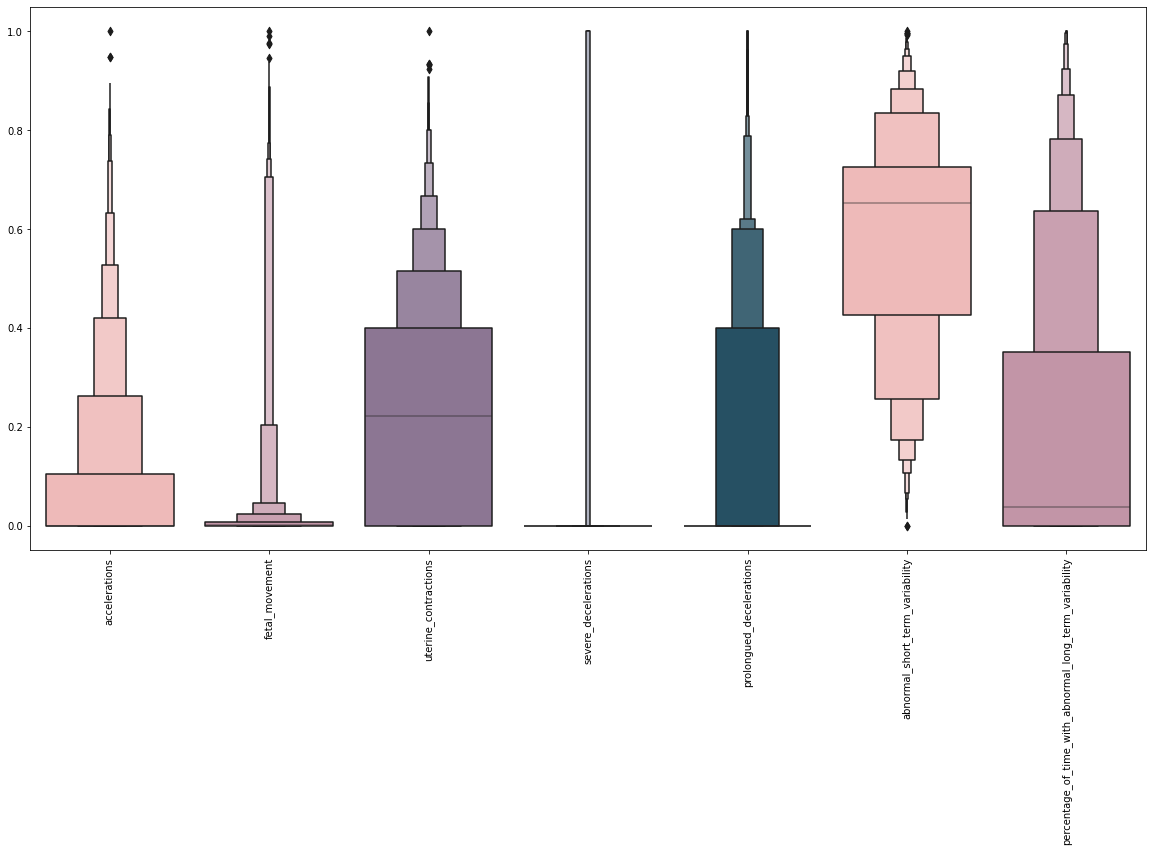

In [12]:
#looking at the scaled features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette=shades)
plt.xticks(rotation=90)
plt.show()

In [13]:
#spliting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

In [14]:
# Model selection process
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(),
    # Passing class_weight='balanced' will hopefully help to make up for the fact that we have imbalanced class data
    'Random Forest Balanced': RandomForestClassifier(class_weight='balanced'),
    'SVC': SVC(class_weight='balanced', probability=True),
    # Complement NB is well-suited to imbalanced data. Maybe it will make up for our imbalanced data.
    'Complement Naive Bayes': ComplementNB()
}

# Fit the pipelines
for name in classifiers:
    classifiers[name].fit(X_train, y_train)

best_classifier = None
best_mean = 0

# Cross validation on accuracy 
cv_results_accuracy = []
for name in classifiers:
    cv_score = cross_val_score(classifiers[name], X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    mean = cv_score.mean()
    print("%s: %f " % (name, mean))
    if mean > best_mean:
        best_mean = mean
        best_classifier = classifiers[name]

Logistic Regression: 0.788204 
Decision Tree: 0.926042 
Random Forest: 0.951655 
Random Forest Balanced: 0.955972 
SVC: 0.870220 
Complement Naive Bayes: 0.733812 


Random Forest with class weight set to balanced seems to be the most accurate model. It is also worth noting that Complement Naive Bayes did not handle our imbalanced class data better and had the worst accuracy of all.

Let's build a better random forest with GridSearchCV.

In [15]:
# Taking look at the test set
pred_rfc = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9590604026845637


In [16]:
# Building a dictionary with lists of optional values that will be analyzed
parameters = { 
    'n_estimators': [100, 150, 200, 500, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8, 12, 14, 16],
    'criterion' :['gini', 'entropy'],
}

# Fitting the training set to find parameters with the best accuracy

# GridSearchCV is very slow because it tries every combination of our params, so we should try RandomizedSearchCV
# when we want to quickly verify a hypothesis because it will generate similar results in less time.

#CV_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, cv=5, n_jobs=-1)
CV_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'), param_distributions=parameters, cv=5, n_jobs=-1)

#CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
#CV_rfc = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'), param_grid=parameters, cv=5, n_jobs=-1)

CV_rfc.fit(X_train, y_train)

# Getting the outcome

CV_rfc.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'entropy'}

In [17]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16)

In [18]:
# We should get high accuracy for our training set
predictions = RF_model.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
accuracy

0.9985611510791367

In [19]:
# Testing the Model on test set
predictions = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9543624161073826

In [20]:
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.9543624161073826
Recall      :  0.9543624161073826
Precision   :  0.9546934489353629
F1 Score    :  0.9543624161073827


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94       520
         2.0       0.93      0.95      0.94       485
         3.0       0.99      0.98      0.99       485

    accuracy                           0.95      1490
   macro avg       0.95      0.96      0.95      1490
weighted avg       0.95      0.95      0.95      1490



We have high precision and recall on class 1, but much lower precision and recall for our other classes.

This is likely a result of having an imbalance in class representation in our data.

array([[482,  35,   3],
       [ 21, 463,   1],
       [  6,   2, 477]])

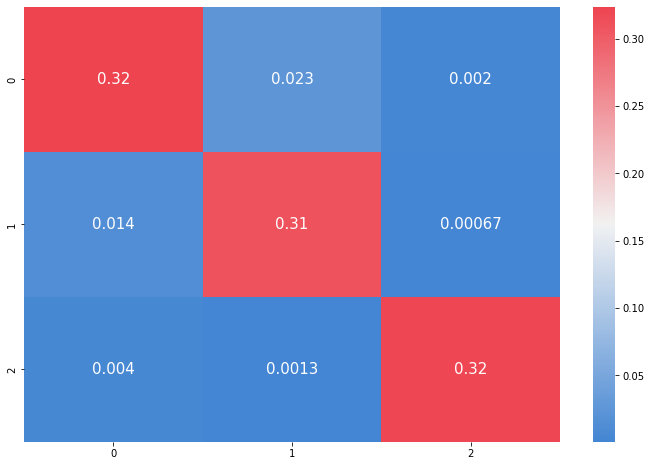

In [22]:
# Confusion matrix
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=cmap, annot=True, annot_kws={ 'size': 15 })
cf_matrix

**<span style="color:#003f5c;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#003f5c;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:#003f5c;">Best Wishes!</span>**

<a id="5"></a> 
# <h1 style='background:#f7b2b0; border:0; color:black'><center>END</center></h1> 